In [1]:
indir='./results/ae_train_1kg_val_1kg_f0'
epoch=107
indir='./results/f0_ae'
epoch=477
indir='./results/ae'
epoch=283

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fn = f'{indir}/confusion_matrix_epoch{epoch}.csv'
conf_mat = pd.read_csv(fn,header=None)
# print(conf_mat)
conf_mat = np.array(conf_mat)
total = np.sum(conf_mat)
print(total)

# calculate the accuracy
accuracy = np.sum(np.diag(conf_mat)) / total
print(accuracy)

520.0
0.8711538461538462


In [4]:
fn = f'{indir}/confusion_matrix_bubble_epoch{epoch}.csv'

conf_mat = pd.read_csv(fn,header=None)
print(conf_mat)
conf_mat = np.array(conf_mat)
# rows are predicted, columns are expected


      0     1     2     3     4      5     6     7     8     9     10    11  \
0   85.2   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1    0.0  83.3   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0  12.5   
2    0.0   0.0  90.9   0.0   0.0    0.0   0.0  10.0   0.0   3.2   0.0   0.0   
3    0.0  11.1   0.0  52.4  21.2    0.0   0.0   0.0   0.0   0.0  10.0   4.2   
4    0.0   5.6   0.0  33.3  78.8    0.0   0.0   0.0   0.0   0.0   5.0   4.2   
5    0.0   0.0   0.0   0.0   0.0  100.0   0.0   5.0   0.0   0.0   0.0   0.0   
6    0.0   0.0   0.0   0.0   0.0    0.0  93.1   0.0   2.8   0.0   0.0   0.0   
7    0.0   0.0   0.0   0.0   0.0    0.0   0.0  85.0   0.0   0.0   0.0   0.0   
8    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0  97.2   0.0   0.0   0.0   
9    0.0   0.0   5.5   0.0   0.0    0.0   0.0   0.0   0.0  87.1   0.0   0.0   
10   0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0  85.0   0.0   
11   0.0   0.0   0.0  14.3   0.0    0.0   0.0   0.0 

In [ ]:
populations = [
    'CHB',
    'CHS',
    'CDX',
    'KHV',
    'JPT',
    # EUR
    'CEU+GBR',
    'IBS',
    'TSI',
    'FIN',
    # AFR
    'GWD',
    'MSL',
    'LWK',
    'ESN',
    'YRI',
    # SAS
    'PJL',
    'BEB',
    # AMR
    'PUR',
    'CLM',
    'PEL',
]

labels = populations
print(labels)


['CHB', 'CHS', 'CDX', 'KHV', 'JPT', 'CEU', 'GBR', 'IBS', 'TSI', 'FIN', 'GWD', 'MSL', 'LWK', 'ESN', 'YRI', 'PJL', 'BEB', 'PUR', 'CLM', 'PEL']


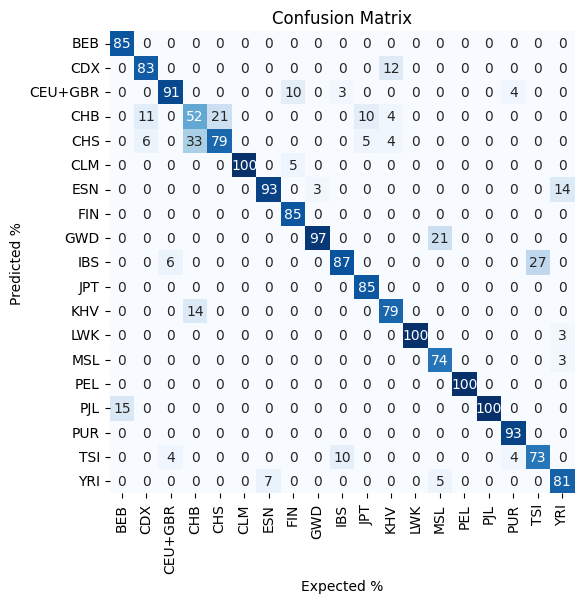

In [6]:
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', cbar=False, 
            xticklabels=labels, yticklabels=labels, fmt='.0f')
plt.title('Confusion Matrix')
plt.xlabel('Expected %')
plt.ylabel('Predicted %')
plt.show()

In [7]:
def get_power(df, degree=0):
    # df is a pandas dataframe of shape (n_classes, n_classes)
    # power: among the expected positive, how many are predicted related
    # rows are expected, columns are predicted
    expected_pos = df.iloc[degree, :].sum()
    predicted_pos = df.iloc[:, degree].sum()
    true_pos = df.iloc[degree, degree]
    predicted_unrelated = df.iloc[degree, 0].sum()
    power = 1 - (predicted_unrelated/expected_pos)
    recall = true_pos/expected_pos
    precision = true_pos/predicted_pos
    f1 = 2*precision*recall/(precision+recall)
    return power*100, recall*100, precision*100, f1*100


In [8]:
def get_F1_score(conf_mat):
    # conf_mat is a numpy array of shape (n_classes, n_classes)
    # rows are predicted, columns are expected
    # return a list of F1 scores for each class
    df = conf_mat.T # rows are expected, columns are predicted
    df = pd.DataFrame(df)
    F1_scores = []
    for i in range(df.shape[0]):
        F1_scores.append(get_power(df, i)[3])
    return F1_scores

f1 = get_F1_score(conf_mat)
# remove nan
f1 = [i for i in f1 if not np.isnan(i)]
[print(i,j) for i,j in zip(labels, f1)]

overall_F1 = np.mean(f1)
print(f'Overall F1 score: {overall_F1}')

BEB 92.0086393088553
CDX 85.0868232890705
CEU+GBR 87.53009147809342
CHB 52.68979386626446
CHS 69.45791097399734
CLM 97.5609756097561
ESN 88.75119161105815
FIN 91.89189189189189
GWD 89.05176362803482
IBS 79.21782628467486
JPT 91.89189189189189
KHV 81.81818181818181
LWK 98.61932938856015
MSL 83.46545866364666
PEL 100.0
PJL 93.1098696461825
PUR 96.26943005181347
TSI 76.68776371308016
YRI 83.56661482633488
Overall F1 score: 86.24607620744149
